In [27]:
import numpy as np
import nibabel as nib
import hippomaps as hm
import glob

/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0_supersession/hippunfold//sub-PNC002//surf/sub-PNC002_hemi-L_space-T1w_den-0p5mm_label-dentate_*thickness*.shape.gii failed
/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0_supersession/hippunfold//sub-PNC002//surf/sub-PNC002_hemi-L_space-T1w_den-0p5mm_label-dentate_*curvature*.shape.gii failed
/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0_supersession/hippunfold//sub-PNC002//surf/sub-PNC002_hemi-L_space-T1w_den-0p5mm_label-dentate_*subfields*.label.gii failed
/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0_supersession/hippunfold//sub-PNC002//surf/sub-PNC002_hemi-R_space-T1w_den-0p5mm_label-dentate_*thickness*.shape.gii failed
/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0_supersession/hippunfold//sub-PNC002//surf/sub-PNC002_hemi-R_space-T1w_den-0p5mm_label-dentate_*curvature*.shape.gii failed
/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0_supersession/hippunfold//sub-PNC002//surf/sub-PNC002_hemi-R_space-T1w_den-0p5mm

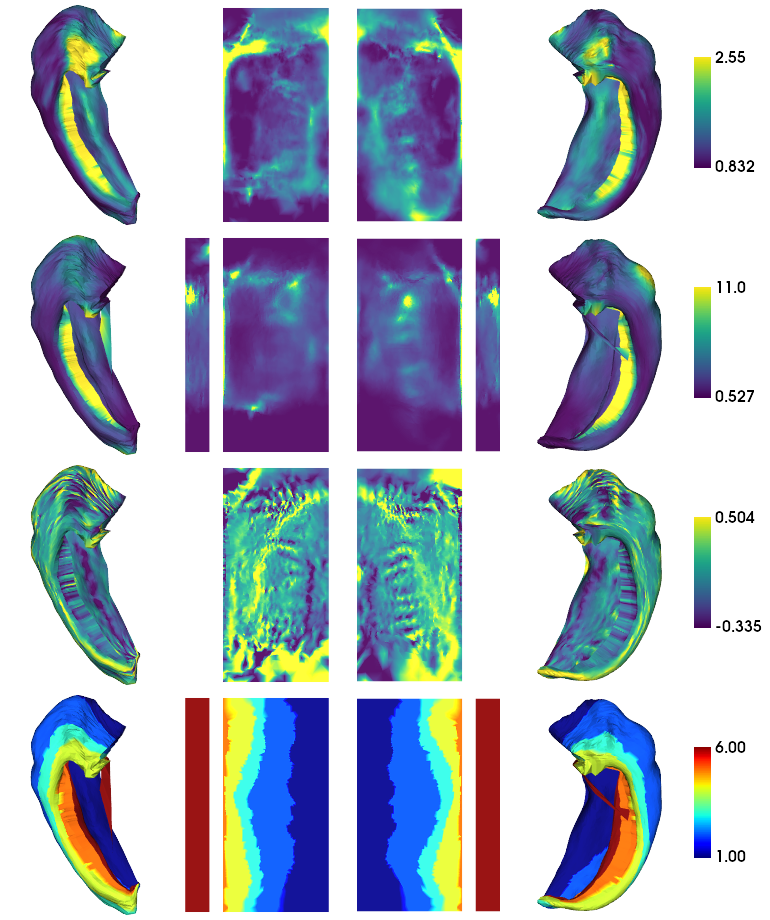

In [59]:
# point to a local subject directory
hippunfold_dir = '/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0_supersession/hippunfold/'
subs = ['PNC002']
ses=''
labels = ['hipp','dentate']
hemis = ['L','R']
features = ['thickness', 'gyrification', 'curvature', 'subfields']

hm.plotting.surfplot_sub_foldunfold(hippunfold_dir, subs[0], ses, features, labels=labels, hemis=hemis, embed_nb=True, color_bar='right', share='row')

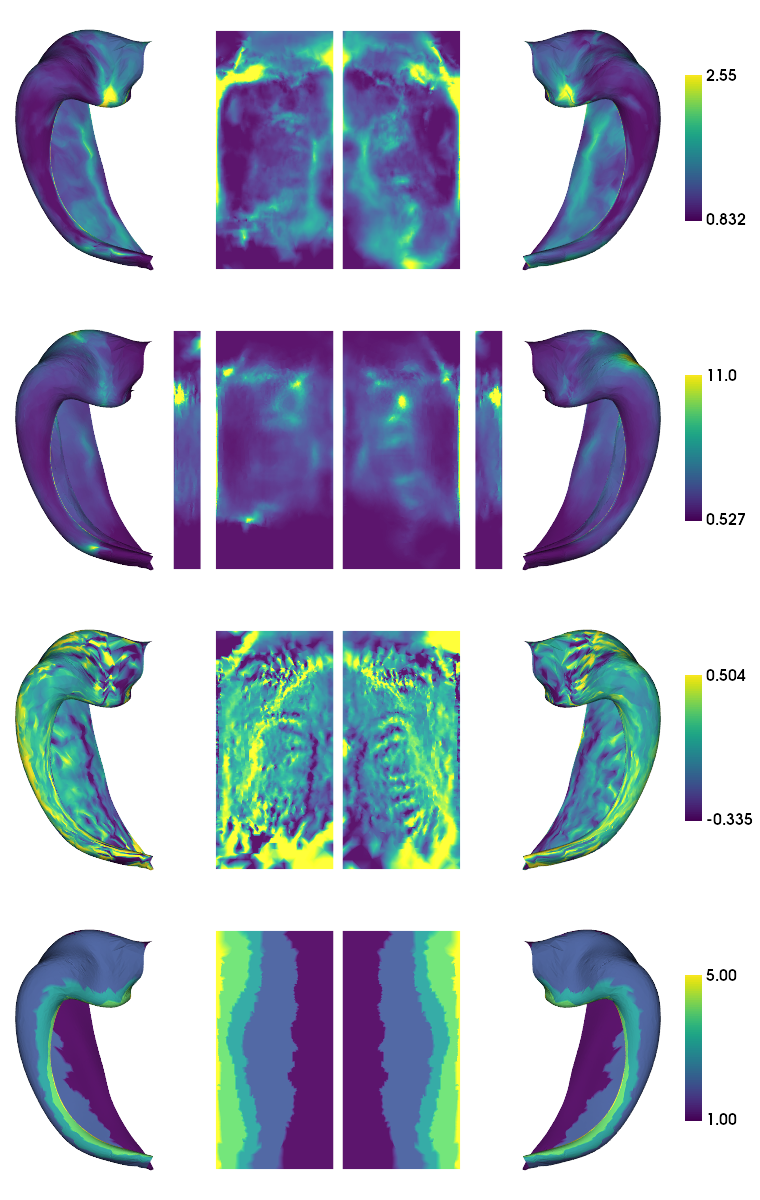

In [64]:
nV,iV = hm.config.get_nVertices(labels,den) 
hipp_dat = np.zeros([nV,len(hemis),len(subs),len(features)])*np.nan
for f,feature in enumerate(features):
    for s,sub in enumerate(subs):
        for h,hemi in enumerate(hemis):
            for l,label in enumerate(labels):
                fn = glob.glob(f'{hippunfold_dir}/sub-{sub}/{ses}/surf/'\
                                 f'sub-{sub}{ses}_hemi-{hemi}_space-T1w'\
                                 f'_den-{den}_label-{label}_*{feature}.*.gii')
                try:
                    d = nib.load(fn[0])
                    hipp_dat[iV[l],h,s,f] = d.darrays[0].data
                except:
                    print()
hipp_dat[:,0,:,2] = -hipp_dat[:,0,:,2] # flip left curvature

hm.plotting.surfplot_canonical_foldunfold(np.mean(hipp_dat[:,:,:,:],axis=2), tighten_cwindow=True, unfoldAPrescale=False, embed_nb=True, color_bar='right', share='row')